In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_zillow_data
from env import get_connection
import os 
from sklearn.model_selection import train_test_split
import wrangle

In [2]:
df = get_zillow_data()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
df.shape

(2152863, 7)

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [7]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [8]:
# drop nulls
df = df.dropna()


In [9]:
# check that nulls were dropped
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

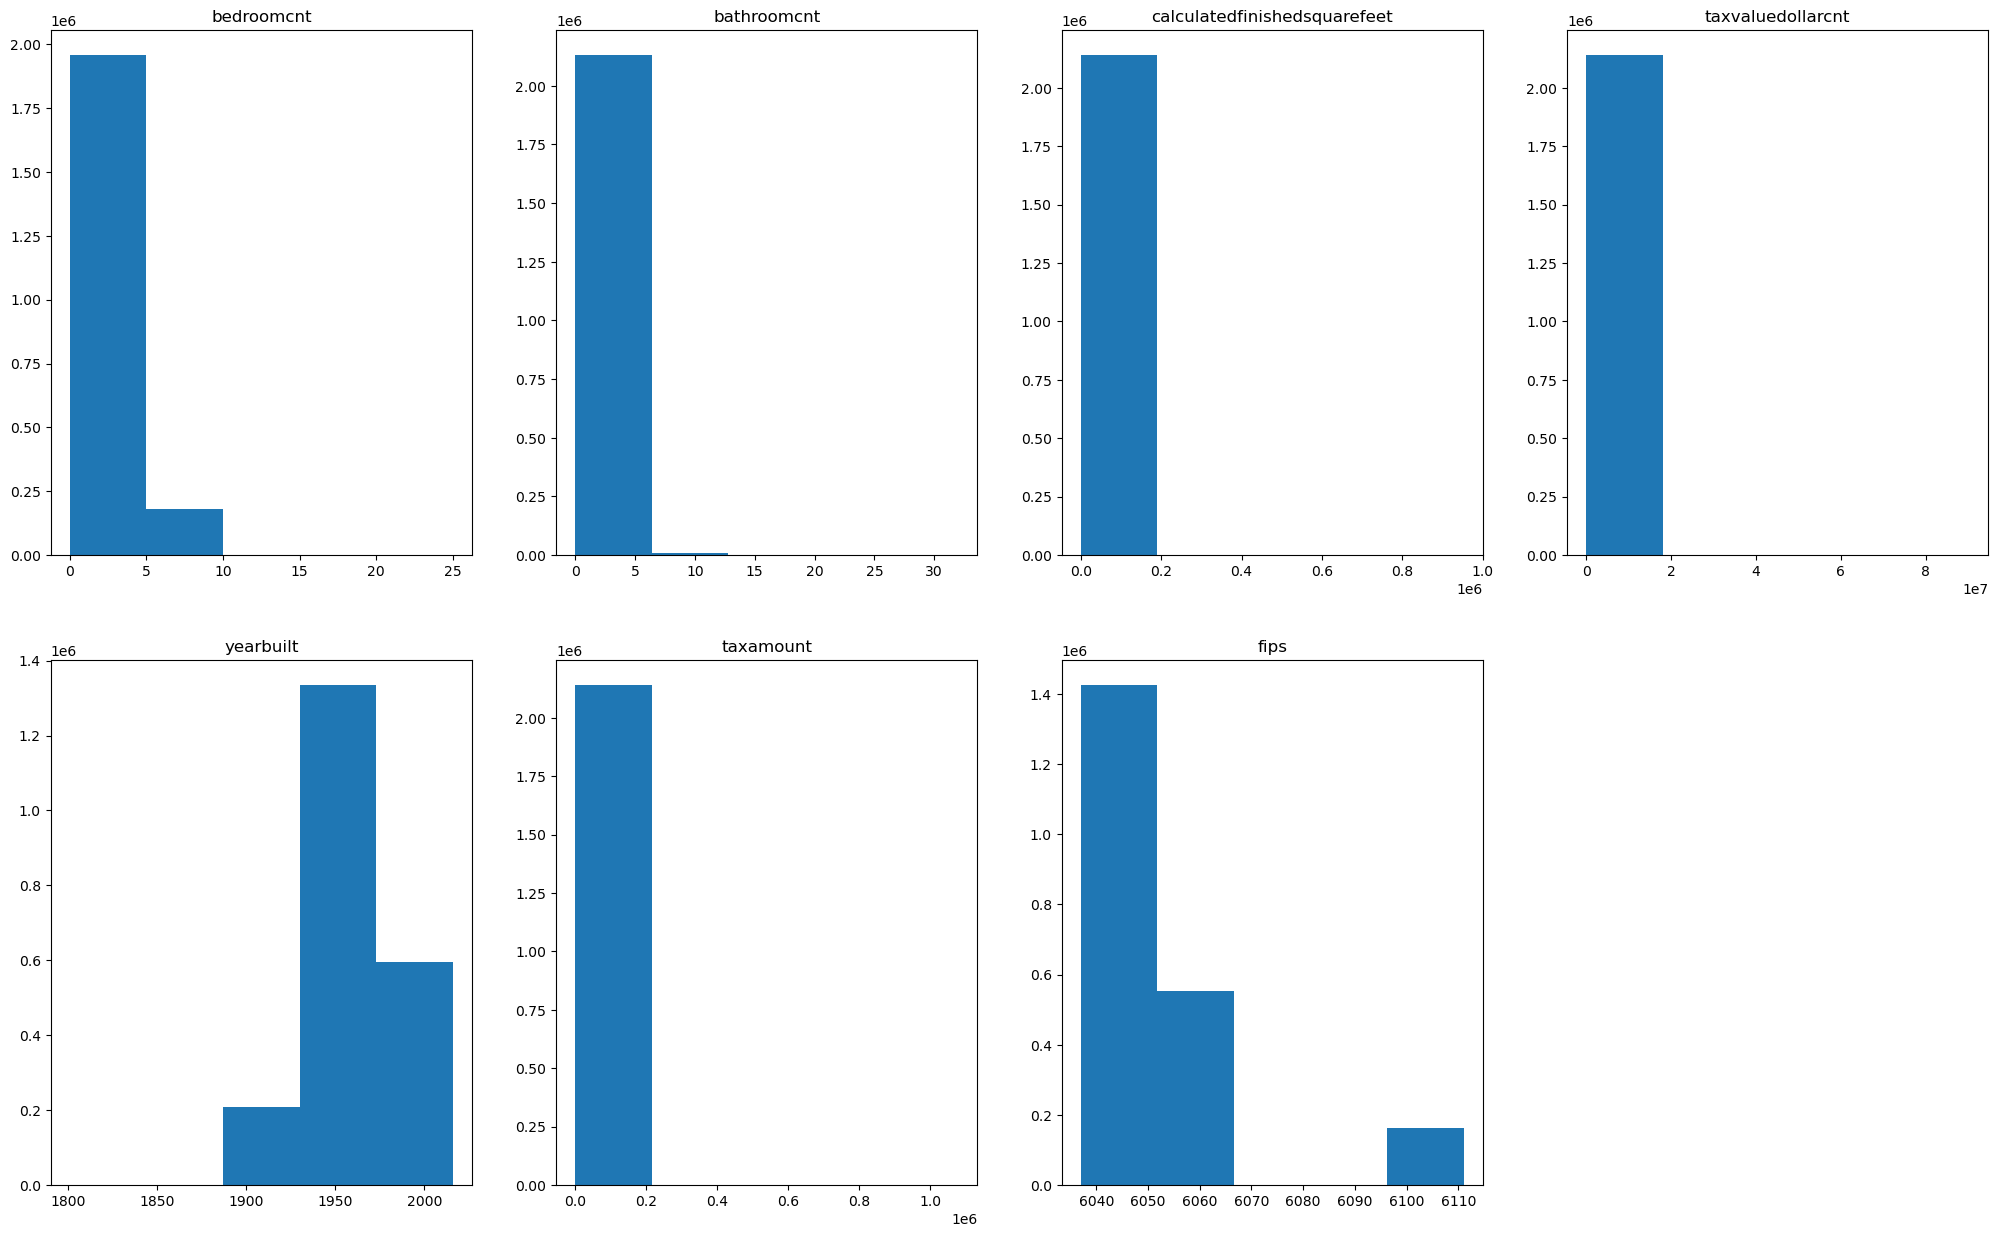

In [10]:
plt.figure(figsize=(25, 15))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(2,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

In [11]:
# rename columns
df = df.rename(columns={'bedroomcnt':'bedrooms', 
                            'bathroomcnt':'bathrooms', 
                            'calculatedfinishedsquarefeet':'square_feet', 
                            'taxvaluedollarcnt':'tax_value',
                            'yearbuilt':'year_built',
                            'taxamount':'tax_amount',
                            })

In [12]:
df.head(10)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
15,0.0,0.0,203.0,14166.0,1960.0,163.79,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
21,4.0,4.0,4144.0,1303522.0,2016.0,14820.10,6037.0


In [13]:
# Convert some columns to integers
    # fips, yearbuilt, and bedrooms can be integers
df["fips"] = df["fips"].astype(int)
df["year_built"] = df["year_built"].astype(int)
df["bedrooms"] = df["bedrooms"].astype(int)    
df["tax_value"] = df["tax_value"].astype(int)
df["square_feet"] = df["square_feet"].astype(int)

In [14]:
df.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathrooms,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
square_feet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
tax_value,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
year_built,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
tax_amount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


In [16]:
df = df[df.bathrooms <= 6]
    
df = df[df.bedrooms <= 6]

df = df[df.tax_value < 2_000_000]

df = df[df.square_feet < 10000]

In [17]:
df.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [18]:
df.bathrooms.value_counts()

2.00    940237
3.00    416448
1.00    412082
2.50    142169
4.00     74208
1.50     31111
3.50     26776
5.00     20921
4.50     16820
6.00      5408
0.00      4164
5.50      4151
0.50        13
1.75         3
Name: bathrooms, dtype: int64

In [19]:
def wrangle_zillow():
    '''
    This function uses the acquire and prepare functions
    and returns the split/cleaned dataframe
    '''
    train, validate, test = prep_zillow(acquire_zillow())
    
    return train, validate, test

In [20]:
def prep_zillow(df):
    '''
    This function takes in the zillow df
    then the data is cleaned and returned
    '''
    #change column names to be more readable
    df = df.rename(columns={'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'square_feet',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built',
                          'taxamount':'tax_amount'
                          })

    #drop null values (this is only 0.5% of df)
    df = df.dropna()

    #drop duplicates
    df.drop_duplicates(inplace=True)
    
    # convert some columns from floats to integers
    df["fips"] = df["fips"].astype(int)
    df["year_built"] = df["year_built"].astype(int)
    df["bedrooms"] = df["bedrooms"].astype(int)    
    df["tax_value"] = df["tax_value"].astype(int)
    df["square_feet"] = df["square_feet"].astype(int)
    
    # train/validate/test split
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    return train, validate, test

In [21]:
def acquire_zillow():
    '''
    This function checks to see if zillow.csv already exists, 
    if it does not, one is created
    '''
    #check to see if telco_churn.csv already exist
    if os.path.isfile('zillow.csv'):
        df = pd.read_csv('zillow.csv', index_col=0)
    
    else:

        #creates new csv if one does not already exist
        df = get_zillow_data()
        df.to_csv('zillow.csv')

    return df

In [22]:
train, validate, test = wrangle_zillow()

In [23]:
train.shape, validate.shape, test.shape

((1192919, 7), (511252, 7), (426043, 7))